In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt
import matplotlib.pyplot as plt

import matplotlib.ticker as plticker

import matplotlib.animation as animation
from matplotlib.ticker import MaxNLocator
from pandas.plotting import table
from scipy import stats
from scipy.interpolate import make_interp_spline, BSpline
from scipy.stats import zscore
from scipy.ndimage import label

import math

# interactive figures
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# misc
import warnings


# Datetime is both a top-level module as well as being a type within that module.
import time
from datetime import datetime, timedelta

# Need to re-import datetime module to avoid confusing with sub-module.
import datetime as dt
#data = pd.read_csv("/Users/lisajin/Documents/Smnology/sleep Heart Health Datasets/Copy of shhs1-200001-nsrr.csv",encoding = "ISO-8859-1")



##headers = np.array(data.columns)  # get headers
#values = data.values  # numpy array of values
#matrix = np.concatenate([[headers], values])  # append to the final matrix


In [3]:
dt = pd.read_csv("/Users/lisajin/Documents/Smnology/sleep Heart Health Datasets/shhs1-hrv-5min-0.16.0.csv",encoding = "ISO-8859-1")



headers = np.array(dt.columns)  # get headers
values = dt.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix

In [4]:
dt.head()

,nsrrid,visitnumber,Start__sec_,ihr,NN_RR,AVNN,SDNN,rMSSD,PNN10,PNN20,...,event14end,event15start,event15end,event16start,event16end,event17start,event17end,event18start,event18end,hasrespevent
0,200079,1,6960,75.112951,0.992000,798.797,46.2118,54.6393,76.5499,44.2049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,200079,1,7260,72.227893,0.991713,830.704,51.1569,27.7348,80.3922,52.6611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,200079,1,7560,72.233893,0.991690,830.635,50.2283,29.5221,82.5843,58.9888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,200079,1,7860,72.486004,0.997238,827.746,28.6337,35.8262,83.6111,57.2222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,200079,1,8160,77.839184,0.994872,770.820,29.1776,20.5235,69.2506,30.7494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
new=dt[['ihr','NN_RR','AVNN','SDNN','rMSSD','PNN10','PNN20','PNN30','PNN40','PNN50','VLF','LF','LF_n','HF','HF_n','LF_HF','hasrespevent']]

In [6]:
import sklearn
from sklearn.metrics import confusion_matrixe
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [7]:
import pandas as pd

def clean_dataset(new):
    assert isinstance(new, pd.DataFrame), "df needs to be a pd.DataFrame"
    new.dropna(inplace=True)
    indices_to_keep = ~new.isin([np.nan, np.inf, -np.inf]).any(1)
    return new[indices_to_keep].astype(np.float64)

In [9]:
# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(new.iloc[:,:-2], 
                                                              new['hasrespevent'], 
                                                              test_size=0.2, 
                                                              random_state=42)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)

X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_valid=X_valid.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train=y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_valid=y_valid.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

X_train_temp=X_train_temp.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test=X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train_temp=y_train_temp.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test=y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [10]:
# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(X_test)

array([[3.69326698e-01, 9.97547782e-01, 3.50159723e-01, ...,
        8.65183214e-01, 1.79993308e-02, 1.34816786e-01],
       [3.63213674e-01, 9.97500585e-01, 3.56175932e-01, ...,
        5.40300619e-01, 8.45318729e-03, 4.59699381e-01],
       [2.19801928e-01, 9.96300127e-01, 5.28314037e-01, ...,
        7.84753869e-01, 8.99739691e-04, 2.15246131e-01],
       ...,
       [4.12925323e-01, 9.94752870e-01, 3.09692282e-01, ...,
        9.19768618e-01, 6.09060208e-03, 8.02313819e-02],
       [3.13528546e-01, 9.96716696e-01, 4.08596758e-01, ...,
        8.60133549e-01, 2.15204642e-02, 1.39866451e-01],
       [5.00021023e-01, 9.98323463e-01, 2.39845331e-01, ...,
        9.26502043e-04, 8.42353740e-03, 9.99073498e-01]])

Decision tree: not a good model

In [11]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [12]:
# Create list of median predictions that has the same length as y_valid
baseline_y = [y_train.median()] * len(y_valid)

# Compute the relevant scores
base_predictions = baseline_y
base_mae = mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(base_mae))
print('Mean Squared Error: {:0.4f}.'.format(base_mse))
print('R^2 Score = {:0.4f}.'.format(base_r2))
print('Accuracy = {:0.2f}%.'.format(base_accuracy))

Model Performance
Mean Absolute Error: 0.3549.
Mean Squared Error: 0.3549.
R^2 Score = -0.5501.
Accuracy = -inf%.


Text(0, 0.5, 'Coefficients')

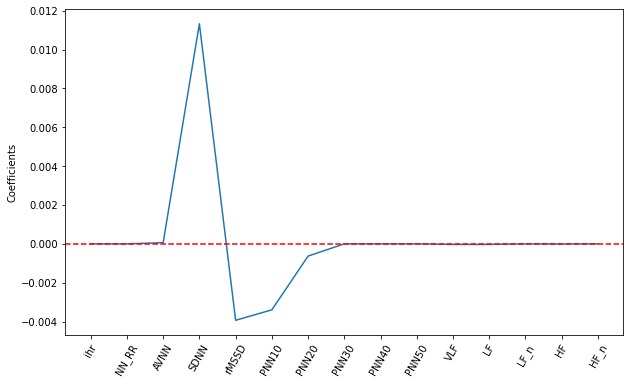

In [13]:
# Create the model
lasso = linear_model.Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

In [15]:
#sigmoid function with the relu implementation
#the binary outcome is has respiration event
#tensorflow 
properties = list(new.columns.values)
properties.remove('hasrespevent')
print(properties)
X = new[properties]
y = new['hasrespevent']
print(X.head())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(16,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model.evaluate(X_test, y_test)

['ihr', 'NN_RR', 'AVNN', 'SDNN', 'rMSSD', 'PNN10', 'PNN20', 'PNN30', 'PNN40', 'PNN50', 'VLF', 'LF', 'LF_n', 'HF', 'HF_n', 'LF_HF']
         ihr     NN_RR     AVNN     SDNN    rMSSD    PNN10    PNN20    PNN30  \
0  75.112951  0.992000  798.797  46.2118  54.6393  76.5499  44.2049  23.9892   
1  72.227893  0.991713  830.704  51.1569  27.7348  80.3922  52.6611  32.7731   
2  72.233893  0.991690  830.635  50.2283  29.5221  82.5843  58.9888  41.8539   
3  72.486004  0.997238  827.746  28.6337  35.8262  83.6111  57.2222  33.0556   
4  77.839184  0.994872  770.820  29.1776  20.5235  69.2506  30.7494  15.2455   

      PNN40     PNN50         VLF        LF      LF_n       HF      HF_n  \
0   6.19946  1.886790   695.63900  285.5300  0.256639  827.046  0.743361   
1  13.16530  5.042020  1890.74140  331.3890  0.389947  518.442  0.610053   
2  13.76400  6.179780  1904.23100  260.8690  0.322499  548.030  0.677501   
3   8.88889  2.500000    42.66966   86.3107  0.129813  578.575  0.870187   
4   2.84

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [23]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)


/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
logisticRegr.predict(X_test[0:10])

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
predictions = logisticRegr.predict(X_test)

In [32]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.6965674338229518


In [33]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1681 2954]
 [ 909 7187]]


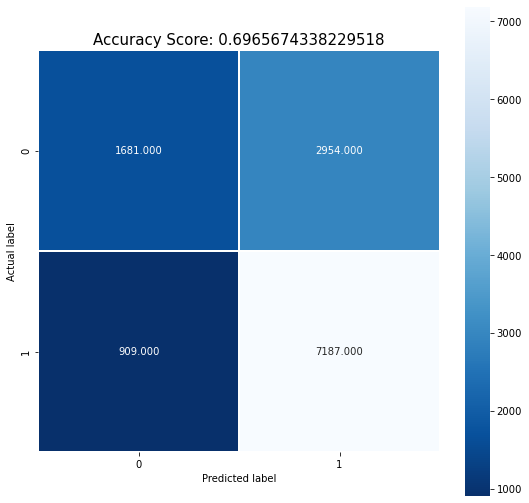

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [58]:
#calculate the metrics measurement in the condusion matrix 
TP=cm[1,1]#TRUE POSITIVE
FP=cm[0,1]#FALSE POSITIVE (TYPE I ERROR)
FN=cm[1,0]#FALSE NEGATIVE (TYPE II ERROR)
TN=cm[0,0]#TURE NEGATIVE

precision=TP/(TP+FP)#sensitivity
accuracy=(TP+TN)/(TP+FP+FN+TN)
recall=TP/(TP+FN) #sensitivity, of all the positve, how many accurate we predicted
specificty=TN/(FP + TN) #correct negative predictions divided by the total number of negatives
NPV = TN / (TN + FN)


In [60]:
print(recall)#the measure of our model correctly identifying True Positives. 
#Thus, for all the patients who actually have heart disease, 
#recall tells us how many we correctly identified as having a heart disease.

print(precision) # the measure of patients that we correctly identify having a heart disease 
#out of all the patients actually having it.
print(specificty)
print(NPV)

0.8877223320158103
0.7087072280840154
0.36267529665587916
0.649034749034749


In our case, it is safe to look at recall as the metrics because it takes in consideration of false negative.